In [1]:
import pandas as pd
df = pd.read_csv("diamonds.csv")

In [2]:
df.shape

(53940, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df_ohe = pd.get_dummies(df)

In [5]:
df_ohe.shape

(53940, 28)

In [6]:
# df_ohe = df_ohe.drop(['Unnamed: 0'],axis=1)
df_ohe = df_ohe.iloc[:,1:]

In [7]:
df_ohe.shape

(53940, 27)

In [8]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

In [9]:
X = df_ohe

In [10]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [16]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

# Knee finding in DBSCAN

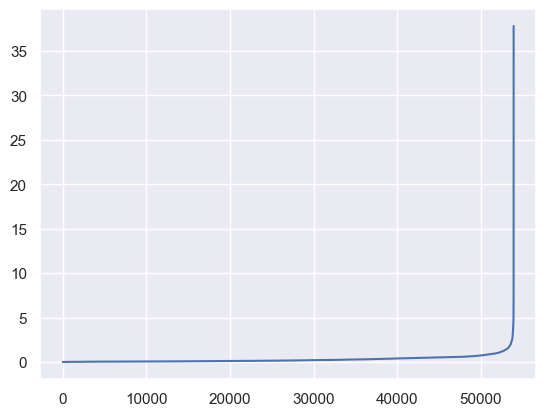

In [17]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# DBSCAN

Number of clusters: 299
Outliers : 257


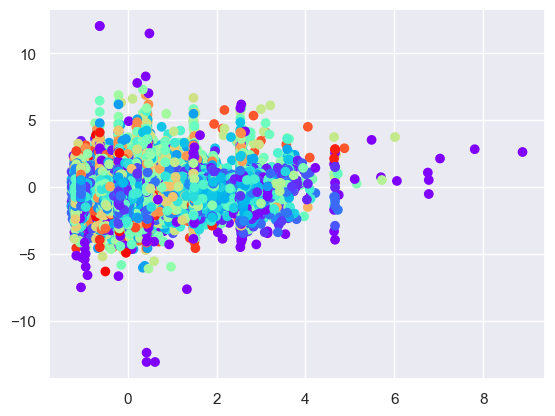

In [21]:
y_pred = DBSCAN(eps=2.67, min_samples=3).fit_predict(X)
import numpy as np
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow')

# Evaluation Parameters

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
cluster_nos=y_pred

In [ ]:
# two parameters to silhouette_score
# X : X_test data
# labels : cluster numbers predicted by the algorithm
silhouette_score(X, cluster_nos)